# Generating a Gene Expression Signature from scRNAseq: GSE144735

Below is loading the packages and methods of Cell2Location and preprocessing the scRNA-seq data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip install --quiet scvi-colab
    from scvi_colab import install
    install()
    !pip install --quiet git+https://github.com/BayraktarLab/cell2location#egg=cell2location[tutorials]

INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           
DEPRECATION: git+https://github.com/BayraktarLab/cell2location#egg=cell2location[tutorials] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os

data_type = 'float32'

import cell2location

import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
adata_scrna_raw = sc.read('/content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/scRNA_belgian_cohort/GSE144735_processed_KUL3_CRC_10X_raw_UMI_count_matrix.txt')

In [ ]:
adata_scrna_raw = adata_scrna_raw.T

In [ ]:
adata_scrna_raw.var['SYMBOL'] = adata_scrna_raw.var.index
adata_scrna_raw.var.index = adata_scrna_raw.var.index.rename('ENSEMBL')

In [ ]:
adata_scrna_raw.var

,SYMBOL
ENSEMBL,
RP11-34P13.3,RP11-34P13.3
FAM138A,FAM138A
OR4F5,OR4F5
RP11-34P13.7,RP11-34P13.7
RP11-34P13.8,RP11-34P13.8
...,...
AC233755.2,AC233755.2
AC233755.1,AC233755.1
AC240274.1,AC240274.1


In [ ]:
adata_scrna_raw.obs.index = adata_scrna_raw.obs.index.rename('Spot_ID')

In [ ]:
adata_scrna_raw.obs

""
Spot_ID
KUL01-T_AAACCTGGTCTTTCAT
KUL01-T_AAACGGGTCGGTTAAC
KUL01-T_AAAGATGGTATAGGGC
KUL01-T_AAAGATGGTGGCCCTA
KUL01-T_AAAGCAAGTAAACACA
...
KUL31-N_CGCTTCAGTGGTCCGT
KUL31-N_CTGTTTAAGGGTTCCC
KUL31-N_GCCTCTATCGCGGATC


In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/scRNA_belgian_cohort/GSE144735_processed_KUL3_CRC_10X_annotation.txt', sep='\t', index_col = "Index")

In [ ]:
metadata

,Patient,Class,Sample,Cell_type,Cell_subtype
Index,,,,,
KUL01-T_AAACCTGGTCTTTCAT,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAACGGGTCGGTTAAC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTATAGGGC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTGGCCCTA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAAGCAAGTAAACACA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
...,...,...,...,...,...
KUL31-N_CGCTTCAGTGGTCCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_CTGTTTAAGGGTTCCC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GCCTCTATCGCGGATC,KUL31,Normal,KUL31-N,Mast cells,Mast cells


In [ ]:
adata_scrna_raw.obs = adata_scrna_raw.obs.join(metadata, how='inner', lsuffix='', rsuffix='')
adata = adata_scrna_raw[~adata_scrna_raw.obs['Cell_type'].isna(), :]

In [ ]:
adata.obs

,Patient,Class,Sample,Cell_type,Cell_subtype
KUL01-T_AAACCTGGTCTTTCAT,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAACGGGTCGGTTAAC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTATAGGGC,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
KUL01-T_AAAGATGGTGGCCCTA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS1
KUL01-T_AAAGCAAGTAAACACA,KUL01,Tumor,KUL01-T,Epithelial cells,CMS3
...,...,...,...,...,...
KUL31-N_CGCTTCAGTGGTCCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_CTGTTTAAGGGTTCCC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GCCTCTATCGCGGATC,KUL31,Normal,KUL31-N,Mast cells,Mast cells
KUL31-N_GGGATGATCACCTCGT,KUL31,Normal,KUL31-N,Mast cells,Mast cells


In [ ]:
#adata.write('/content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/scRNA_belgian_cohort/scRNA_raw_with_annotations.txt')

## Reduce the number of genes by discarding lowly expressed genes

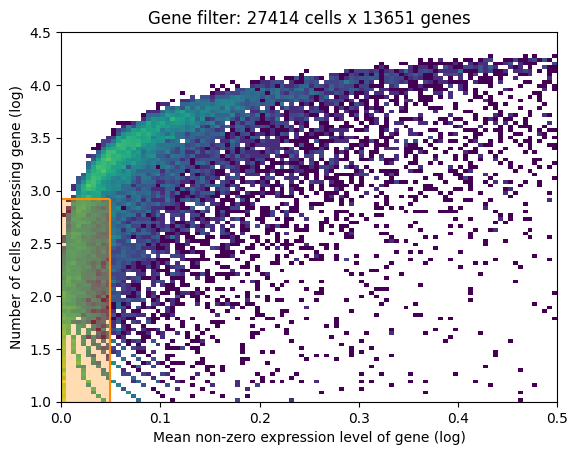

In [ ]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(adata, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
adata = adata[:, selected].copy()

In [ ]:
# Add counts matrix as adata_ref.raw
adata.raw = adata

In [ ]:
adata

AnnData object with n_obs × n_vars = 27414 × 13651
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype'
    var: 'SYMBOL', 'n_cells', 'nonz_mean'

## Cell Annotations

In [ ]:
adata.X = adata.raw.X.copy()

In [ ]:
sc.pp.log1p(adata)

In [ ]:
def min_max_scale_with_pseudocount(data, feature_range=(0, 1), pseudocount=1e-6):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    data_scaled = (data - min_val + pseudocount) / (max_val - min_val + pseudocount)
    data_scaled *= (feature_range[1] - feature_range[0])
    data_scaled += feature_range[0]
    return data_scaled

In [ ]:
sc.pp.scale(adata, max_value=10)
#adata.X = min_max_scale_with_pseudocount(adata_annot.X)
sc.tl.pca(adata, svd_solver='arpack', n_comps=80, use_highly_variable=False)

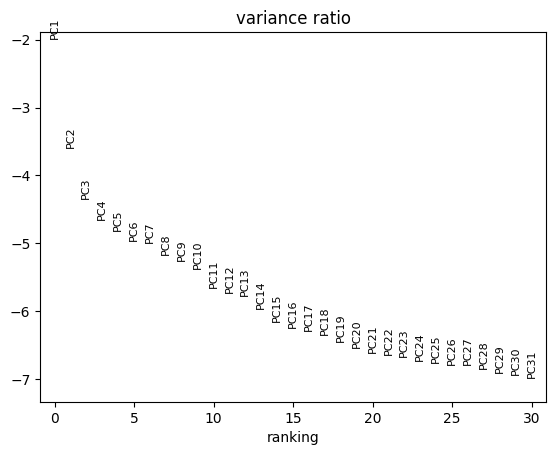

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
!pip install bbknn

In [ ]:
# remove the first PC which explains large amount of variance in total UMI count (likely technical variation)
adata.obsm['X_pca'] = adata.obsm['X_pca'][:, 1:]
adata.varm['PCs'] = adata.varm['PCs'][:, 1:]
#########################

# Here BBKNN (https://github.com/Teichlab/bbknn) is used to align batches (10X experiments)
import bbknn
bbknn.bbknn(adata, neighbors_within_batch = 3, batch_key = 'Sample', n_pcs = 79)
sc.tl.umap(adata, min_dist = 0.8, spread = 1.5)

#########################

adata = adata[adata.obs['Cell_subtype'].argsort(),:]

In [ ]:
adata.X

ArrayView([[-0.40928474, -0.31546938, -0.18851577, ...,  2.2669253 ,
            -0.0305279 , -0.05126251],
           [ 1.9419298 , -0.31546938, -0.18851577, ..., -0.3017548 ,
            -0.0305279 , -0.05126251],
           [ 1.9419298 , -0.31546938, -0.18851577, ..., -0.3017548 ,
            -0.0305279 , -0.05126251],
           ...,
           [-0.40928474, -0.31546938, -0.18851577, ..., -0.3017548 ,
            -0.0305279 , -0.05126251],
           [-0.40928474, -0.31546938, -0.18851577, ..., -0.3017548 ,
            -0.0305279 , -0.05126251],
           [-0.40928474, -0.31546938, -0.18851577, ..., -0.3017548 ,
            -0.0305279 , -0.05126251]], dtype=float32)

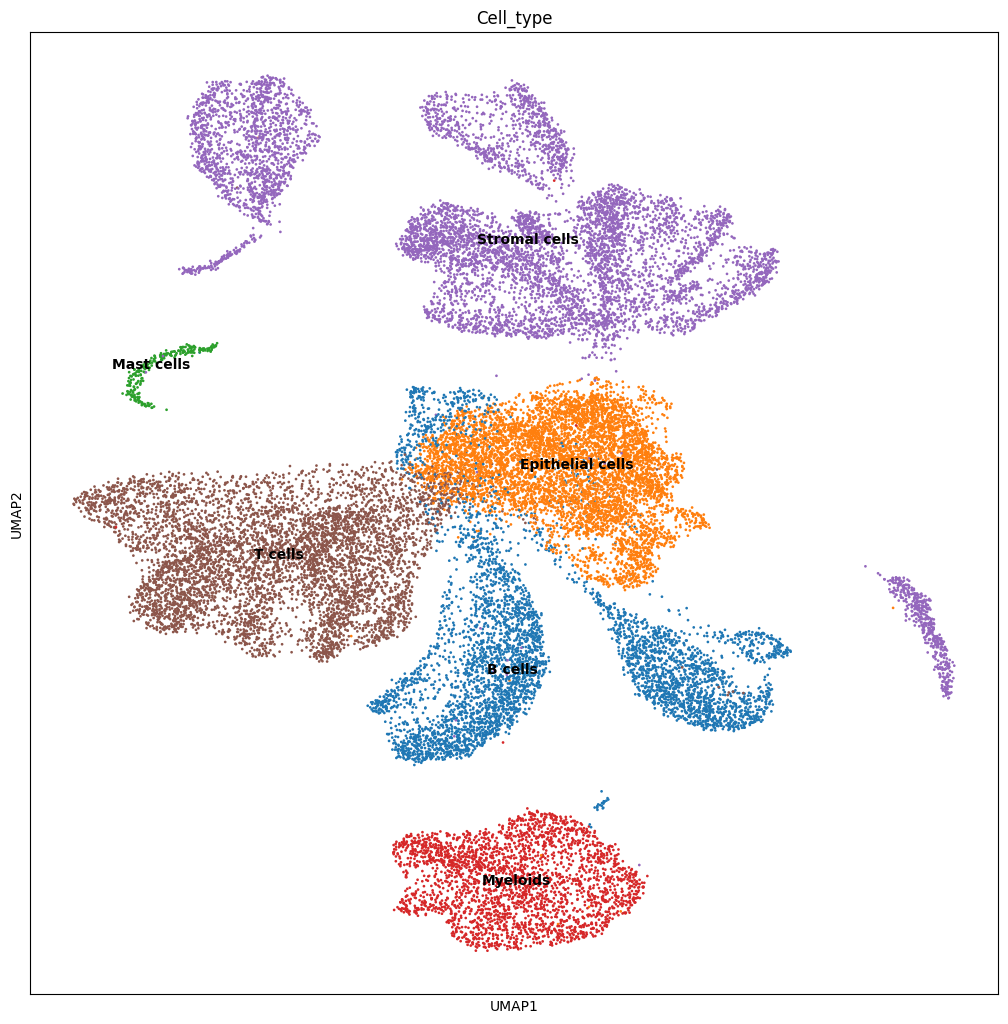

In [ ]:
with mpl.rc_context({'figure.figsize': [12.5, 12.5],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['Cell_type'], size=15,
               color_map = 'RdPu', ncols = 1, legend_loc='on data',
               legend_fontsize=10)

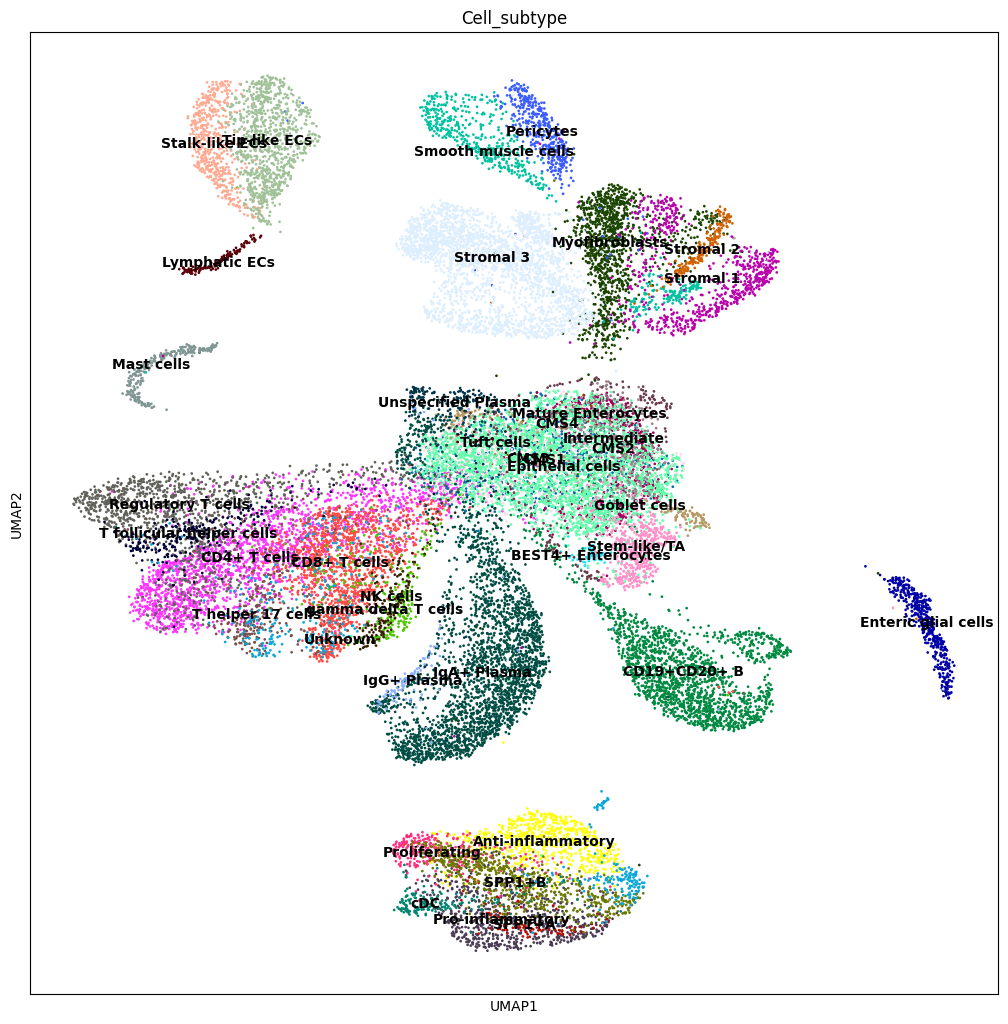

In [ ]:
with mpl.rc_context({'figure.figsize': [12.5, 12.5],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['Cell_subtype'], size=15,
               color_map = 'RdPu', ncols = 1, legend_loc='on data',
               legend_fontsize=10)

In [ ]:
print(adata)
print(adata.X)

AnnData object with n_obs × n_vars = 27414 × 13651
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype'
    var: 'SYMBOL', 'n_cells', 'nonz_mean', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Cell_type_colors', 'Cell_subtype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
[[-0.40928474 -0.31546938 -0.18851577 ...  2.2669253  -0.0305279
  -0.05126251]
 [ 1.9419298  -0.31546938 -0.18851577 ... -0.3017548  -0.0305279
  -0.05126251]
 [ 1.9419298  -0.31546938 -0.18851577 ... -0.3017548  -0.0305279
  -0.05126251]
 ...
 [-0.40928474 -0.31546938 -0.18851577 ... -0.3017548  -0.0305279
  -0.05126251]
 [-0.40928474 -0.31546938 -0.18851577 ... -0.3017548  -0.0305279
  -0.05126251]
 [-0.40928474 -0.31546938 -0.18851577 ... -0.3017548  -0.0305279
  -0.05126251]]


## Estimation of reference cell type signatures

In [ ]:
# define path of results
results_folder = '/content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/results_belgian_cohort/'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'

In [ ]:
adata.X = adata.raw.X
print(adata.X)

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# prepare anndata for the regression model
cell2location.models.RegressionModel.setup_anndata(adata=adata,
                        # 10X reaction / sample / batch
                        batch_key='Sample',
                        # cell type, covariate used for constructing signatures
                        labels_key='Cell_subtype',
                        # multiplicative technical effects (platform, 3' vs 5', donor effect)
                        categorical_covariate_keys=['Class']
                       )

In [ ]:
# create the regression model
from cell2location.models import RegressionModel
mod = RegressionModel(adata)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 1.1.1.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample',
│   'labels_key': 'Cell_subtype',
│   'categorical_covariate_keys': ['Class'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  18   │
│         n_cells          │ 27414 │
│ n_extra_categorical_covs │   1   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │  40   │
│          n_vars          │ 13651 │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                   batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │  KUL01-B   │          0          │
│                     │  KUL01-N   │          1          │
│                     │  KUL01-T   │          2          │
│                     │  KUL19-B   │          3          │
│                     │  KUL19-N   │          4          │
│                     │  KUL19-T   │          5          │
│                     │  KUL21-B   │          6          │
│                     │  KUL21-N   │          7          │
│                     │  KUL21-T   │          8          │
│                     │  KUL28-B   │          9          │
│                     │  KUL28-N   │         10          │
│                     │  KUL28-T   │         11          │
│                     │  KUL30-B   │         12          │
│                     │  KUL30-N   │         13          │
│                     │  KUL30-T   │         14          │
│                     │  KUL31-B   │         15          │
│                     │  KUL31-N   │         16          │
│                     │  KUL31-T   │         17          │
└─────────────────────┴────────────┴─────────────────────┘

                             labels State Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃        Categories         ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Cell_subtype'] │     Anti-inflammatory     │          0          │
│                           │    BEST4+ Enterocytes     │          1          │
│                           │       CD4+ T cells        │          2          │
│                           │       CD8+ T cells        │          3          │
│                           │       CD19+CD20+ B        │          4          │
│                           │           CMS1            │          5          │
│                           │           CMS2            │          6          │
│                           │           CMS3            │          7          │
│                           │           CMS4            │          8          │
│                           │    Enteric glial cells    │          9          │
│                           │     Epithelial cells      │         10          │
│                           │       Goblet cells        │         11          │
│                           │        IgA+ Plasma        │         12          │
│                           │        IgG+ Plasma        │         13          │
│                           │       Intermediate        │         14          │
│                           │       Lymphatic ECs       │         15          │
│                           │        Mast cells         │         16          │
│                           │    Mature Enterocytes     │         17          │
│                           │      Myofibroblasts       │         18          │
│                           │         NK cells          │         19          │
│                           │         Pericytes         │         20          │
│                           │     Pro-inflammatory      │         21          │
│                           │       Proliferating       │         22          │
│                           │    Regulatory T cells     │         23          │
│                           │          SPP1+A           │         24          │
│                           │          SPP1+B           │         25          │
│                           │    Smooth muscle cells    │         26          │
│                           │      Stalk-like ECs       │         27          │
│                           │       Stem-like/TA        │         28          │
│                           │         Stromal 1         │         29          │
│                           │         Stromal 2         │         30          │
│                           │         Stromal 3         │         31          │
│                           │ T follicular helper cells │         32          │
│                           │     T helper 17 cells     │         33          │
│                           │       Tip-like ECs        │         34          │
│                           │        Tuft cells         │         35          │
│                           │          Unknown          │         36          │
│                           │    Unspecified Plasma     │         37          │
│                           │            cDC            │         38          │
│                           │    gamma delta T cells    │         39          │
└───────────────────────────┴───────────────────────────┴─────────────────────┘

          extra_categorical_covs State Registry          
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Class'] │   Border   │          0          │
│                    │   Normal   │          1          │
│                    │   Tumor    │          2          │
│                    │            │                     │
└────────────────────┴────────────┴─────────────────────┘

In [ ]:
mod.train(max_epochs=250)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:lightning.pytorch.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly 

Epoch 250/250: 100%|██████████| 250/250 [05:09<00:00,  1.29s/it, v_num=1, elbo_train=1.54e+8]

INFO: `Trainer.fit` stopped: `max_epochs=250` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=250` reached.


Epoch 250/250: 100%|██████████| 250/250 [05:09<00:00,  1.24s/it, v_num=1, elbo_train=1.54e+8]


In [ ]:
adata

AnnData object with n_obs × n_vars = 27414 × 13651
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'SYMBOL', 'n_cells', 'nonz_mean', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Cell_type_colors', 'Cell_subtype_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap', '_scvi_extra_categorical_covs'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

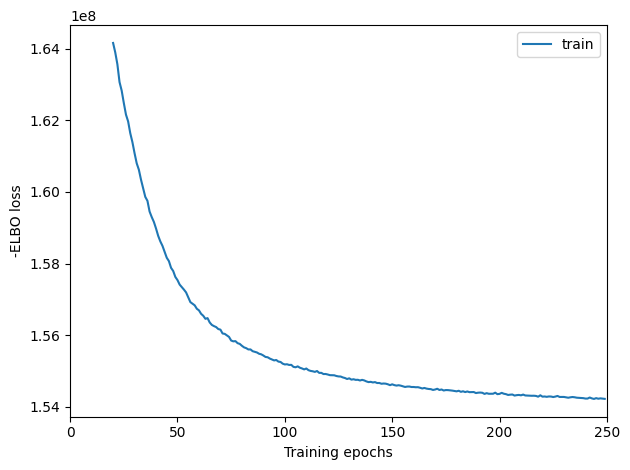

In [ ]:
mod.plot_history(20)

In [ ]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata = mod.export_posterior(
    adata, sample_kwargs={'num_samples': 1000, 'batch_size': 2500}
)

# Save model
mod.save(f"{ref_run_name}", overwrite=True)

# Save anndata object with results
adata_file = f"{ref_run_name}/sc.h5ad"
adata.write(adata_file)
adata_file

Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 72.85it/s]


'/content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/results_belgian_cohort//reference_signatures/sc.h5ad'

In [ ]:
#adata = mod.export_posterior(
#    adata, use_quantiles=True,
    # choose quantiles
#    add_to_varm=["q05","q50", "q95", "q0001"],
#    sample_kwargs={'batch_size': 2500}
#)

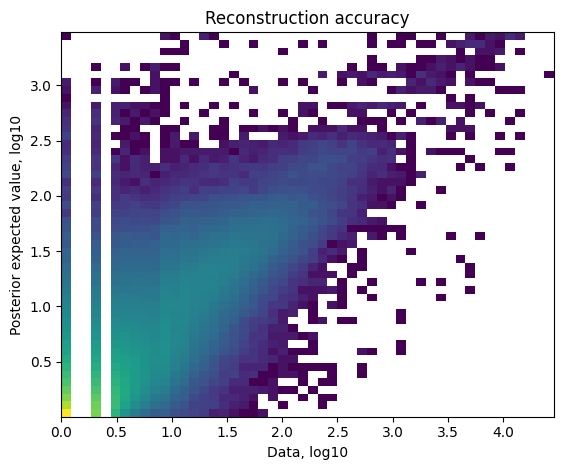

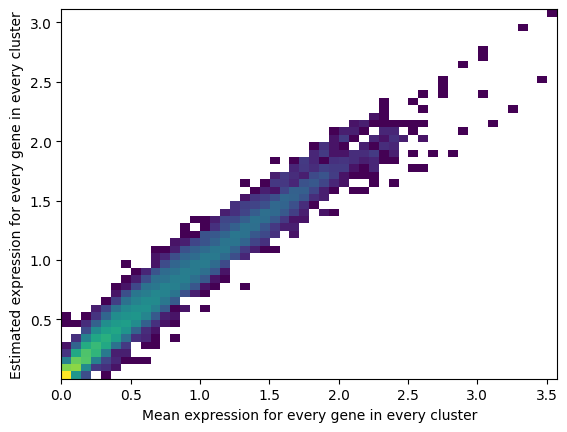

In [ ]:
mod.plot_QC()

In [ ]:
adata

AnnData object with n_obs × n_vars = 27414 × 13651
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'SYMBOL', 'n_cells', 'nonz_mean', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Cell_type_colors', 'Cell_subtype_colors', '_scvi_uuid', '_scvi_manager_uuid', 'mod'
    obsm: 'X_pca', 'X_umap', '_scvi_extra_categorical_covs'
    varm: 'PCs', 'means_per_cluster_mu_fg', 'stds_per_cluster_mu_fg', 'q05_per_cluster_mu_fg', 'q95_per_cluster_mu_fg'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_file = f"{ref_run_name}/sc.h5ad"
adata = sc.read_h5ad(adata_file)
mod = cell2location.models.RegressionModel.load(f"{ref_run_name}", adata)

INFO     File                                                                                                      
         /content/drive/MyDrive/STEMREM205_Group_Project/Cell2Loc/results_belgian_cohort//reference_signatures/mode
         l.pt already downloaded                                                                                   


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/730:   0%|          | 1/730 [00:00<01:31,  7.94it/s, v_num=1]

INFO: `Trainer.fit` stopped: `max_steps=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


Epoch 1/730:   0%|          | 1/730 [00:00<01:38,  7.39it/s, v_num=1]


In [ ]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata.varm.keys():
    inf_aver = adata.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata.uns['mod']['factor_names']
inf_aver.iloc[0:5, 0:5]

,Anti-inflammatory,BEST4+ Enterocytes,CD4+ T cells,CD8+ T cells,CD19+CD20+ B
ENSEMBL,,,,,
FO538757.2,0.125066,0.783642,0.090650,0.091620,0.101489
AP006222.2,0.135689,0.281786,0.015082,0.034778,0.035333
SAMD11,0.002133,0.032214,0.000719,0.001376,0.001761
NOC2L,0.077159,0.661035,0.087943,0.093600,0.124337
PLEKHN1,0.002975,0.025472,0.017521,0.008312,0.001166


In [ ]:
adata

AnnData object with n_obs × n_vars = 27414 × 13651
    obs: 'Patient', 'Class', 'Sample', 'Cell_type', 'Cell_subtype', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'SYMBOL', 'n_cells', 'nonz_mean', 'mean', 'std'
    uns: 'Cell_subtype_colors', 'Cell_type_colors', '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'mod', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', '_scvi_extra_categorical_covs'
    varm: 'PCs', 'means_per_cluster_mu_fg', 'q05_per_cluster_mu_fg', 'q95_per_cluster_mu_fg', 'stds_per_cluster_mu_fg'
    obsp: 'connectivities', 'distances'

In [ ]:
inf_aver

,Anti-inflammatory,BEST4+ Enterocytes,CD4+ T cells,CD8+ T cells,CD19+CD20+ B,CMS1,CMS2,CMS3,CMS4,Enteric glial cells,...,Stromal 2,Stromal 3,T follicular helper cells,T helper 17 cells,Tip-like ECs,Tuft cells,Unknown,Unspecified Plasma,cDC,gamma delta T cells
ENSEMBL,,,,,,,,,,,,,,,,,,,,,
FO538757.2,0.125066,0.783642,0.090650,0.091620,0.101489,0.311664,0.270811,0.362058,0.025848,0.128777,...,0.217714,0.243497,0.095901,0.105540,0.224055,0.119148,0.067490,0.011180,0.395203,0.132133
AP006222.2,0.135689,0.281786,0.015082,0.034778,0.035333,0.118435,0.078367,0.115307,0.058990,0.137853,...,0.106554,0.285504,0.023721,0.028891,0.177931,0.036143,0.044449,0.010388,0.120383,0.049379
SAMD11,0.002133,0.032214,0.000719,0.001376,0.001761,0.002350,0.006683,0.003669,0.024536,0.007343,...,0.283141,0.408285,0.004131,0.005403,0.009120,0.047555,0.002134,0.006360,0.013517,0.012532
NOC2L,0.077159,0.661035,0.087943,0.093600,0.124337,0.555654,0.302827,0.451317,0.305241,0.097846,...,0.200162,0.260636,0.072751,0.129407,0.231865,0.026622,0.053167,0.008898,0.334702,0.074369
PLEKHN1,0.002975,0.025472,0.017521,0.008312,0.001166,0.151801,0.072048,0.136057,0.090181,0.003713,...,0.022502,0.001606,0.008565,0.029441,0.011984,0.032129,0.026515,0.006066,0.027987,0.037925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,0.026785,0.137415,0.024229,0.011835,0.058452,0.044670,0.037459,0.135186,0.030167,0.037801,...,0.017922,0.060168,0.086888,0.009081,0.028893,0.038346,0.011063,0.010204,0.043332,0.032429
AC007325.4,0.030137,0.021029,0.005568,0.006667,0.001857,0.044867,0.138412,0.062348,0.028556,0.014602,...,0.018345,0.104492,0.010388,0.012371,0.059271,0.032526,0.010676,0.006139,0.033172,0.033582
AC004556.1,0.043121,0.161007,0.006936,0.004971,0.015936,0.084586,0.189990,0.244559,0.053400,0.013385,...,0.011947,0.043652,0.030951,0.023015,0.008595,0.107843,0.008953,0.012644,0.092172,0.015216
